In [1]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import model_selection, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV, StratifiedKFold   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc, cohen_kappa_score
from itertools import cycle
from sklearn.model_selection import StratifiedKFold
import seaborn as sb

In [2]:
# Load the data
train_df = pd.read_csv('LargeTrain.csv')

In [2]:
X = train_df.ix[:,0:len(train_df.columns)-2]
Y = train_df["Class"]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
#thresholds = sorted(model.feature_importances_, reverse=True)
thresholds = [0.006,0.005,0.003,0.002,0.001,0.0005,0.000]

for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 99.41%
Thresh=0.006, n=33, Accuracy: 99.39%
Thresh=0.005, n=42, Accuracy: 99.41%
Thresh=0.003, n=88, Accuracy: 99.44%
Thresh=0.002, n=135, Accuracy: 99.41%
Thresh=0.001, n=259, Accuracy: 99.41%
Thresh=0.001, n=398, Accuracy: 99.39%
Thresh=0.000, n=1803, Accuracy: 99.41%


In [4]:
thresholds = np.linspace(0.0021, 0.0049, num = 29)

for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.5f, n=%d, Accuracy: %.6f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.00210, n=118, Accuracy: 99.470309%
Thresh=0.00220, n=118, Accuracy: 99.470309%
Thresh=0.00230, n=106, Accuracy: 99.498188%
Thresh=0.00240, n=106, Accuracy: 99.498188%
Thresh=0.00250, n=106, Accuracy: 99.498188%
Thresh=0.00260, n=96, Accuracy: 99.442431%
Thresh=0.00270, n=96, Accuracy: 99.442431%
Thresh=0.00280, n=88, Accuracy: 99.442431%
Thresh=0.00290, n=88, Accuracy: 99.442431%
Thresh=0.00300, n=88, Accuracy: 99.442431%
Thresh=0.00310, n=79, Accuracy: 99.470309%
Thresh=0.00320, n=79, Accuracy: 99.470309%
Thresh=0.00330, n=71, Accuracy: 99.414553%
Thresh=0.00340, n=71, Accuracy: 99.414553%
Thresh=0.00350, n=71, Accuracy: 99.414553%
Thresh=0.00360, n=65, Accuracy: 99.358796%
Thresh=0.00370, n=65, Accuracy: 99.358796%
Thresh=0.00380, n=58, Accuracy: 99.358796%
Thresh=0.00390, n=58, Accuracy: 99.358796%
Thresh=0.00400, n=58, Accuracy: 99.358796%
Thresh=0.00410, n=55, Accuracy: 99.275160%
Thresh=0.00420, n=55, Accuracy: 99.275160%
Thresh=0.00430, n=52, Accuracy: 99.275160%
Thresh

In [5]:
selection = SelectFromModel(model, threshold=0.0025, prefit=True)
selected_X_train = selection.transform(X_train)

In [13]:
print(X_train.shape)

(7281, 1803)


In [3]:
target = 'Class'
IDcol = 'loc'
predictors = [x for x in train_df.columns if x not in [target, IDcol]]

my_scorer = metrics.make_scorer(metrics.f1_score, average="weighted")

In [5]:
param_test1 = {
 'max_depth':range(3,20,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring=my_scorer,n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_df[predictors],train_df[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/Users/stybill/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99658, std: 0.00091, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.99650, std: 0.00117, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.99650, std: 0.00117, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.99668, std: 0.00101, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.99687, std: 0.00145, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.99641, std: 0.00126, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.99668, std: 0.00105, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.99677, std: 0.00118, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.99668, std: 0.00169, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.99659, std: 0.00093, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.99696, std: 0.00109, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.99678, std: 0.00132, params: {'max_depth': 9, 'min_child_weight': 5},
  mean: 0.99659, std: 0.00093, params: {

/Users/stybill/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


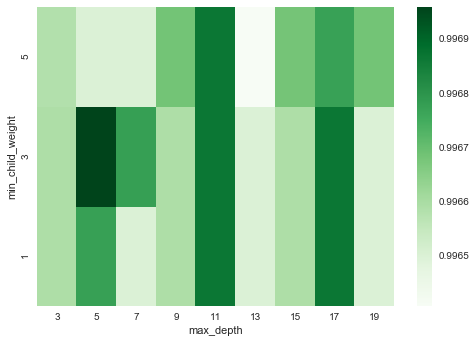

In [20]:
grid_visualization = []

for grid_pair in gsearch1.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (3, 9)
sb.heatmap(grid_visualization, cmap='Greens')
plt.xticks(np.arange(9) + 0.5, gsearch1.param_grid['max_depth'])
plt.yticks(np.arange(3) + 0.5, gsearch1.param_grid['min_child_weight'][::])
plt.xlabel('max_depth')
plt.ylabel('min_child_weight')

In [ ]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_df[predictors],train_df[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [ ]:
grid_visualization = []

for grid_pair in gsearch2.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (3, 3)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, gsearch2.param_grid['min_samples_leaf'])
plt.yticks(np.arange(3) + 0.5, gsearch2.param_grid['min_samples_split'][::-1])
plt.xlabel('min_samples_leaf')
plt.ylabel('min_samples_split')

In [4]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring=my_scorer,n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_df[predictors],train_df[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

/Users/stybill/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99687, std: 0.00145, params: {'gamma': 0.0},
  mean: 0.99696, std: 0.00127, params: {'gamma': 0.1},
  mean: 0.99678, std: 0.00128, params: {'gamma': 0.2},
  mean: 0.99668, std: 0.00127, params: {'gamma': 0.3},
  mean: 0.99640, std: 0.00178, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.99695890602455817)

/Users/stybill/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


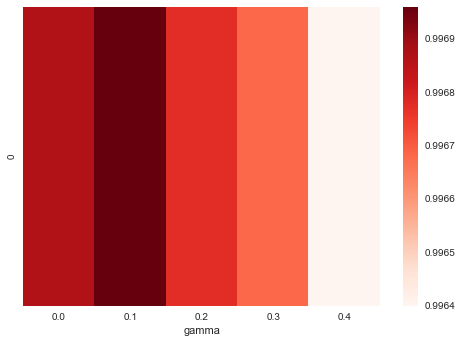

In [7]:
grid_visualization = []

for grid_pair in gsearch3.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (1, 5)
sb.heatmap(grid_visualization, cmap='Reds')
plt.xticks(np.arange(5) + 0.5, gsearch3.param_grid['gamma'])
plt.xlabel('gamma')